# LSTM 

## Outline
1. [Imports](#imports)
2. [Data](#data)
3. [Model](#model)
5. [Train](#train)
6. [Predict](#predict)

<a name=imports></a>
## Imports

In [52]:
%load_ext autoreload
%autoreload 2
import os
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

import preprocessing

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<a name=data></a>
## Data

### Ingestion 

In [53]:
# Check preprocessing.py for implementation
(india_cases_df, india_vacc_df, usa_cases_df, usa_vacc_df) = preprocessing.ingestion()

Parent Directory /covid19-prediction/models
Path: /covid19-prediction/models/../cleaned_datasets/india/daily_cases_india.csv
Exists: True
India Cases:
          Date  Confirmed  Deaths  Recovered
0  2020-01-30        NaN     NaN        NaN
1  2020-01-31        0.0     0.0        0.0
2  2020-02-01        0.0     0.0        0.0
3  2020-02-02        1.0     0.0        0.0
4  2020-02-03        1.0     0.0        0.0 

India Vacc:
          Date  Total_Doses
0  2021-01-15          NaN
1  2021-01-16          NaN
2  2021-01-17      33120.0
3  2021-01-18     229748.0
4  2021-01-19     220786.0 

USA Cases:
          Date  Confirmed  Deaths  Recovered
0  2020-04-12        NaN     NaN        NaN
1  2020-04-13    25255.0  1542.0    11785.0
2  2020-04-14    26694.0  2327.0     6484.0
3  2020-04-15    29318.0  2474.0     6093.0
4  2020-04-16    31235.0  4607.0     5234.0 

USA Vacc:
          Date  Total_Doses
0  2020-12-20     556208.0
1  2020-12-21     614117.0
2  2020-12-22     811071.0
3  2020-

### Pre-Processing

### Multivariate

In [54]:
# Check preprocessing.py for implementation
# Number of Null in India - 563
# Number of Null in USA - 261
(india_multi, usa_multi) = preprocessing.multivariate(india_cases_df, india_vacc_df, usa_cases_df, usa_vacc_df)

India:
          Date  Confirmed  Total_Doses
0  2020-01-30        NaN          NaN
1  2020-01-31        0.0          NaN
2  2020-02-01        0.0          NaN
3  2020-02-02        1.0          NaN
4  2020-02-03        1.0          NaN
USA:
          Date  Confirmed  Total_Doses
0  2020-04-12        NaN          NaN
1  2020-04-13    25255.0          NaN
2  2020-04-14    26694.0          NaN
3  2020-04-15    29318.0          NaN
4  2020-04-16    31235.0          NaN


### Univariate 

In [55]:
# Check preprocessing.py for implementation
# Number of Null in India - 0
# Number of Null in USA - 0
(india_cases_uni, usa_cases_uni) = preprocessing.univariate(india_cases_df, usa_cases_df)

India Cases:
    Confirmed
1        0.0
2        0.0
3        1.0
4        1.0
5        0.0 

USA Cases:
    Confirmed
1    25255.0
2    26694.0
3    29318.0
4    31235.0
5    32175.0 



### Drop Null

In [56]:
(india_multi, usa_multi) = preprocessing.dropNull(india_multi, usa_multi)

India:
            Date  Confirmed  Total_Doses
353  2021-01-17    13788.0      33120.0
354  2021-01-18    10050.0     229748.0
355  2021-01-19    13816.0     220786.0
356  2021-01-20    15244.0     131649.0
357  2021-01-21    14545.0     237050.0
USA:
            Date  Confirmed  Total_Doses
252  2020-12-20   185355.0     556208.0
253  2020-12-21   189716.0     614117.0
254  2020-12-22   201947.0     811071.0
255  2020-12-23   225777.0    1008025.0
256  2020-12-24   204900.0    1476305.0


### Normalize

In [57]:
# Check preprocessing.py for implementation
(india_uni_norm, usa_uni_norm, india_multi_norm, usa_multi_norm,india_cases_mean,india_cases_std,usa_cases_mean,usa_cases_std,india_multi_mean,india_multi_std,
usa_multi_std) = preprocessing.normalize(india_cases_uni, 
                                                                                           usa_cases_uni, 
                                                                                           india_multi, 
                                                                                           usa_multi)

India Cases univariate:
    Confirmed
1  -0.661747
2  -0.661747
3  -0.661734
4  -0.661734
5  -0.661747 

USA Cases univariate:
    Confirmed
1  -0.596456
2  -0.584433
3  -0.562508
4  -0.546491
5  -0.538637 

India Cases multivariate:
      Confirmed  Total_Doses
353  -0.562592    -1.302360
354  -0.601182    -1.243797
355  -0.562303    -1.246466
356  -0.547561    -1.273014
357  -0.554777    -1.241622 

USA Cases multivariate:
      Confirmed  Total_Doses
252   0.492914    -1.809935
253   0.523316    -1.809749
254   0.608584    -1.809118
255   0.774713    -1.808487
256   0.629171    -1.806987 



### Create Splits

In [58]:
# Create train test splits
(india_uni_train, india_uni_test, usa_uni_train, usa_uni_test) = preprocessing.split(india_uni_norm, usa_uni_norm, 0.2)
(india_multi_train, india_multi_test, 
 usa_multi_train, usa_multi_test) = preprocessing.split(india_multi_norm, usa_multi_norm, 0.2)

India:
      Confirmed
1    -0.661747
2    -0.661747
3    -0.661734
4    -0.661734
5    -0.661747
..         ...
565  -0.199747
566  -0.183686
567  -0.181453
568  -0.209217
569  -0.255301

[569 rows x 1 columns] 

USA:
      Confirmed
1    -0.596456
2    -0.584433
3    -0.562508
4    -0.546491
5    -0.538637
..         ...
507   0.882933
508   0.655423
509   1.161010
510  -0.188293
511  -0.412010

[511 rows x 1 columns] 

India:
      Confirmed  Total_Doses
353  -0.562592    -1.302360
354  -0.601182    -1.243797
355  -0.562303    -1.246466
356  -0.547561    -1.273014
357  -0.554777    -1.241622
..         ...          ...
638  -0.557172     1.442780
639  -0.572482     0.707335
640  -0.575745    -0.078616
641  -0.597332     0.183795
642  -0.582053    -0.697398

[279 rows x 2 columns] 

USA:
      Confirmed  Total_Doses
252   0.492914    -1.809935
253   0.523316    -1.809749
254   0.608584    -1.809118
255   0.774713    -1.808487
256   0.629171    -1.806987
..         ...          ...
55

### Data Transformation
Simple conversion from pandas dataframe to numpy array by extracting the values

In [59]:
# Univariate
india_uni_train_np, india_uni_test_np = india_uni_train.values,  india_uni_test.values
usa_uni_train_np, usa_uni_test_np = usa_uni_train.values, usa_uni_test.values
# Multivariate
india_multi_train_np, india_multi_test_np = india_multi_train.values,  india_multi_test.values
usa_multi_train_np, usa_multi_test_np = usa_multi_train.values, usa_multi_test.values

In [60]:
print(india_uni_train_np.shape, india_uni_test_np.shape)
print(india_multi_train_np.shape, india_multi_test_np.shape)

(569, 1) (143, 1)
(279, 2) (70, 2)


### Reshape
Converts the exiting train data set to match the input parameters of an LSTM (Samples, Time Steps, Features). The `lstm_data_transform()` method takes in 3 arguments: X data, y data and number of features.

We will be performing autoregression on the univariate data, therefore the X and y values are the same. As for the multivariate data, we will be using the confirmed column (index 0) as the y value.

In [61]:
india_uni_train_np

array([[-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61734342e-01],
       [-6.61734342e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61747475e-01],
       [-6.61721209e-01],
       [-6.61747475e-01],
       [-6.61445411e-01],
       [-6.61721209e-01],
       [-6.61734342e-01],
       [-6.61708076e-01],
       [-6.61681809e-01],
       [-6.6

In [62]:
timesteps = 14

In [63]:
# Univariate
india_uni_train_X, india_uni_train_y = preprocessing.lstm_data_transform(india_uni_train_np, india_uni_train_np,
                                                                         timesteps)
usa_uni_train_X, usa_uni_train_y = preprocessing.lstm_data_transform(usa_uni_train_np, usa_uni_train_np,
                                                                     timesteps)
# Multivariate
india_multi_train_X, india_multi_train_y = preprocessing.lstm_data_transform(india_multi_train_np,
                                                                             india_multi_train_np[:,0], timesteps)
usa_multi_train_X, usa_multi_train_y = preprocessing.lstm_data_transform(usa_multi_train_np,
                                                                         usa_multi_train_np[:,0], timesteps)

In [64]:
print("Univariate India shape:",india_uni_train_X.shape, india_uni_train_y.shape)
print("Multivariate India shape:",india_multi_train_X.shape, india_multi_train_y.shape)

Univariate India shape: (555, 14, 1) (555, 1)
Multivariate India shape: (265, 14, 2) (265,)


The univariate array shape for the India dataset has 566 samples, 3 as the time step, and 1 feature for the X values. The y values is just the 566 samples.

Similarly, the multivariate array shape for the India dataset has 276 samples, 3 as the time step, and 2 features for the X values. The y values is just the 276 samples of the 0th column (Confirmed cases).

<a name=model></a>
## Model
We will define 4 models in total. One for the univariate data and another for the multivariate for each country.

In [65]:
import LSTMmodels
from keras.wrappers.scikit_learn import KerasRegressor
import tensorflow as tf

In [66]:
univariate_model_ind = LSTMmodels.build_lstm(time_steps=india_uni_train_X.shape[1],
                                             features=india_uni_train_X.shape[2])
univariate_model_usa = LSTMmodels.build_lstm(time_steps=usa_uni_train_X.shape[1],
                                             features=usa_uni_train_X.shape[2])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_8 (Dense)              (None, 20)                2020      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 21        
Total params: 42,841
Trainable params: 42,841
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_10 (Dense)             (None, 20)                2020      
____________________________

In [67]:
multivariate_model_ind = LSTMmodels.build_lstm(time_steps=india_multi_train_X.shape[1],
                                               features=india_multi_train_X.shape[2], outputs=1)
multivariate_model_usa = LSTMmodels.build_lstm(time_steps=usa_multi_train_X.shape[1],
                                               features=usa_multi_train_X.shape[2], outputs=1)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100)               41200     
_________________________________________________________________
dense_12 (Dense)             (None, 20)                2020      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 21        
Total params: 43,241
Trainable params: 43,241
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 100)               41200     
_________________________________________________________________
dense_14 (Dense)             (None, 20)                2020      
____________________________

<a name=train></a>
## Train 

In [68]:
# Get the path of the current working directory
curPath = os.getcwd()
# Appened the parent directory to the current path to step out of the current folder
parentDir = os.path.abspath(os.path.join(curPath, os.pardir))
# Tensorboard callback
logdir = os.path.join(parentDir+"/logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [69]:
def train_models(model,train_X,train_y,test_X,test_y):
    model.fit(train_X,train_y,
              validation_data=(test_X,test_y),
              epochs=300,
              callbacks=[tensorboard_callback])
    return model
#     model.save(save_name)

In [92]:
# Train the model on univariate India dataset 
univariate_model_ind = LSTMmodels.train_model(univariate_model_ind,india_uni_train_X,india_uni_train_y,
                                              tensorboard_callback)

Epoch 1/300
18/18 [==============================] - 0s 28ms/step - loss: 0.0307 - mae: 0.0307
Epoch 2/300
18/18 [==============================] - 0s 12ms/step - loss: 0.0315 - mae: 0.0315
Epoch 3/300
18/18 [==============================] - 0s 12ms/step - loss: 0.0358 - mae: 0.0358
Epoch 4/300
18/18 [==============================] - 0s 12ms/step - loss: 0.0330 - mae: 0.0330
Epoch 5/300
18/18 [==============================] - 0s 13ms/step - loss: 0.0299 - mae: 0.0299
Epoch 6/300
18/18 [==============================] - 0s 12ms/step - loss: 0.0289 - mae: 0.0289
Epoch 7/300
18/18 [==============================] - 0s 13ms/step - loss: 0.0302 - mae: 0.0302
Epoch 8/300
18/18 [==============================] - 0s 13ms/step - loss: 0.0341 - mae: 0.0341
Epoch 9/300
18/18 [==============================] - 0s 13ms/step - loss: 0.0321 - mae: 0.0321
Epoch 10/300
18/18 [==============================] - 0s 13ms/step - loss: 0.0307 - mae: 0.0307
Epoch 11/300
18/18 [=============================

18/18 [==============================] - 0s 13ms/step - loss: 0.0259 - mae: 0.0259
Epoch 87/300
18/18 [==============================] - 0s 13ms/step - loss: 0.0255 - mae: 0.0255
Epoch 88/300
18/18 [==============================] - 0s 12ms/step - loss: 0.0276 - mae: 0.0276
Epoch 89/300
18/18 [==============================] - 0s 13ms/step - loss: 0.0272 - mae: 0.0272
Epoch 90/300
18/18 [==============================] - 0s 12ms/step - loss: 0.0276 - mae: 0.0276
Epoch 91/300
18/18 [==============================] - 0s 12ms/step - loss: 0.0324 - mae: 0.0324
Epoch 92/300
18/18 [==============================] - 0s 12ms/step - loss: 0.0289 - mae: 0.0289
Epoch 93/300
18/18 [==============================] - 0s 12ms/step - loss: 0.0272 - mae: 0.0272
Epoch 94/300
18/18 [==============================] - 0s 13ms/step - loss: 0.0275 - mae: 0.0275
Epoch 95/300
18/18 [==============================] - 0s 12ms/step - loss: 0.0299 - mae: 0.0299
Epoch 96/300
18/18 [==============================] -

18/18 [==============================] - 0s 13ms/step - loss: 0.0223 - mae: 0.0223
Epoch 171/300
18/18 [==============================] - 0s 13ms/step - loss: 0.0246 - mae: 0.0246
Epoch 172/300
18/18 [==============================] - 0s 13ms/step - loss: 0.0252 - mae: 0.0252
Epoch 173/300
18/18 [==============================] - 0s 12ms/step - loss: 0.0252 - mae: 0.0252
Epoch 174/300
18/18 [==============================] - 0s 12ms/step - loss: 0.0252 - mae: 0.0252
Epoch 175/300
18/18 [==============================] - 0s 12ms/step - loss: 0.0221 - mae: 0.0221
Epoch 176/300
18/18 [==============================] - 0s 12ms/step - loss: 0.0245 - mae: 0.0245
Epoch 177/300
18/18 [==============================] - 0s 12ms/step - loss: 0.0237 - mae: 0.0237
Epoch 178/300
18/18 [==============================] - 0s 12ms/step - loss: 0.0231 - mae: 0.0231
Epoch 179/300
18/18 [==============================] - 0s 12ms/step - loss: 0.0238 - mae: 0.0238
Epoch 180/300
18/18 [=======================

18/18 [==============================] - 0s 12ms/step - loss: 0.0259 - mae: 0.0259
Epoch 255/300
18/18 [==============================] - 0s 12ms/step - loss: 0.0245 - mae: 0.0245
Epoch 256/300
18/18 [==============================] - 0s 11ms/step - loss: 0.0217 - mae: 0.0217
Epoch 257/300
18/18 [==============================] - 0s 13ms/step - loss: 0.0233 - mae: 0.0233
Epoch 258/300
18/18 [==============================] - 0s 12ms/step - loss: 0.0257 - mae: 0.0257
Epoch 259/300
18/18 [==============================] - 0s 12ms/step - loss: 0.0247 - mae: 0.0247
Epoch 260/300
18/18 [==============================] - 0s 12ms/step - loss: 0.0247 - mae: 0.0247
Epoch 261/300
18/18 [==============================] - 0s 11ms/step - loss: 0.0231 - mae: 0.0231
Epoch 262/300
18/18 [==============================] - 0s 12ms/step - loss: 0.0243 - mae: 0.0243
Epoch 263/300
18/18 [==============================] - 0s 12ms/step - loss: 0.0234 - mae: 0.0234
Epoch 264/300
18/18 [=======================

In [93]:
# Train the model on univariate USA dataset 
univariate_model_usa = LSTMmodels.train_model(univariate_model_usa,usa_uni_train_X,usa_uni_train_y,
                                              tensorboard_callback)

Epoch 1/300
16/16 [==============================] - 0s 30ms/step - loss: 0.0495 - mae: 0.0495
Epoch 2/300
16/16 [==============================] - 0s 12ms/step - loss: 0.0406 - mae: 0.0406
Epoch 3/300
16/16 [==============================] - 0s 12ms/step - loss: 0.0406 - mae: 0.0406
Epoch 4/300
16/16 [==============================] - 0s 13ms/step - loss: 0.0390 - mae: 0.0390
Epoch 5/300
16/16 [==============================] - ETA: 0s - loss: 0.0345 - mae: 0.034 - 0s 13ms/step - loss: 0.0364 - mae: 0.0364
Epoch 6/300
16/16 [==============================] - 0s 13ms/step - loss: 0.0395 - mae: 0.0395
Epoch 7/300
16/16 [==============================] - 0s 12ms/step - loss: 0.0393 - mae: 0.0393
Epoch 8/300
16/16 [==============================] - 0s 12ms/step - loss: 0.0382 - mae: 0.0382
Epoch 9/300
16/16 [==============================] - 0s 12ms/step - loss: 0.0389 - mae: 0.0389
Epoch 10/300
16/16 [==============================] - 0s 12ms/step - loss: 0.0392 - mae: 0.0392
Epoch 11/30

16/16 [==============================] - 0s 13ms/step - loss: 0.0349 - mae: 0.0349
Epoch 87/300
16/16 [==============================] - 0s 12ms/step - loss: 0.0328 - mae: 0.0328
Epoch 88/300
16/16 [==============================] - 0s 13ms/step - loss: 0.0357 - mae: 0.0357
Epoch 89/300
16/16 [==============================] - 0s 13ms/step - loss: 0.0328 - mae: 0.0328
Epoch 90/300
16/16 [==============================] - 0s 13ms/step - loss: 0.0334 - mae: 0.0334
Epoch 91/300
16/16 [==============================] - 0s 13ms/step - loss: 0.0331 - mae: 0.0331
Epoch 92/300
16/16 [==============================] - 0s 12ms/step - loss: 0.0330 - mae: 0.0330
Epoch 93/300
16/16 [==============================] - 0s 13ms/step - loss: 0.0331 - mae: 0.0331
Epoch 94/300
16/16 [==============================] - 0s 11ms/step - loss: 0.0319 - mae: 0.0319
Epoch 95/300
16/16 [==============================] - 0s 12ms/step - loss: 0.0317 - mae: 0.0317
Epoch 96/300
16/16 [==============================] -

16/16 [==============================] - 0s 12ms/step - loss: 0.0326 - mae: 0.0326
Epoch 171/300
16/16 [==============================] - 0s 13ms/step - loss: 0.0324 - mae: 0.0324
Epoch 172/300
16/16 [==============================] - 0s 12ms/step - loss: 0.0334 - mae: 0.0334
Epoch 173/300
16/16 [==============================] - 0s 12ms/step - loss: 0.0336 - mae: 0.0336
Epoch 174/300
16/16 [==============================] - 0s 13ms/step - loss: 0.0322 - mae: 0.0322
Epoch 175/300
16/16 [==============================] - 0s 13ms/step - loss: 0.0308 - mae: 0.0308
Epoch 176/300
16/16 [==============================] - 0s 13ms/step - loss: 0.0326 - mae: 0.0326
Epoch 177/300
16/16 [==============================] - 0s 12ms/step - loss: 0.0359 - mae: 0.0359
Epoch 178/300
16/16 [==============================] - 0s 13ms/step - loss: 0.0373 - mae: 0.0373
Epoch 179/300
16/16 [==============================] - 0s 12ms/step - loss: 0.0333 - mae: 0.0333
Epoch 180/300
16/16 [=======================

16/16 [==============================] - 0s 12ms/step - loss: 0.0308 - mae: 0.0308
Epoch 255/300
16/16 [==============================] - 0s 13ms/step - loss: 0.0302 - mae: 0.0302
Epoch 256/300
16/16 [==============================] - 0s 13ms/step - loss: 0.0296 - mae: 0.0296
Epoch 257/300
16/16 [==============================] - 0s 13ms/step - loss: 0.0294 - mae: 0.0294
Epoch 258/300
16/16 [==============================] - 0s 12ms/step - loss: 0.0282 - mae: 0.0282
Epoch 259/300
16/16 [==============================] - 0s 13ms/step - loss: 0.0275 - mae: 0.0275
Epoch 260/300
16/16 [==============================] - 0s 13ms/step - loss: 0.0277 - mae: 0.0277
Epoch 261/300
16/16 [==============================] - 0s 13ms/step - loss: 0.0308 - mae: 0.0308
Epoch 262/300
16/16 [==============================] - 0s 12ms/step - loss: 0.0276 - mae: 0.0276
Epoch 263/300
16/16 [==============================] - 0s 13ms/step - loss: 0.0297 - mae: 0.0297
Epoch 264/300
16/16 [=======================

In [72]:
# Train the model on multivariate India dataset
multivariate_model_ind = LSTMmodels.train_model(multivariate_model_ind,india_multi_train_X,india_multi_train_y,
                                                tensorboard_callback)

Epoch 1/300
9/9 [==============================] - 1s 49ms/step - loss: 0.6027 - mae: 0.6027
Epoch 2/300
9/9 [==============================] - 0s 12ms/step - loss: 0.3683 - mae: 0.3683
Epoch 3/300
9/9 [==============================] - 0s 12ms/step - loss: 0.2661 - mae: 0.2661
Epoch 4/300
9/9 [==============================] - 0s 13ms/step - loss: 0.2775 - mae: 0.2775
Epoch 5/300
9/9 [==============================] - 0s 12ms/step - loss: 0.2138 - mae: 0.2138
Epoch 6/300
9/9 [==============================] - 0s 12ms/step - loss: 0.1911 - mae: 0.1911
Epoch 7/300
9/9 [==============================] - 0s 12ms/step - loss: 0.1580 - mae: 0.1580
Epoch 8/300
9/9 [==============================] - 0s 12ms/step - loss: 0.1552 - mae: 0.1552
Epoch 9/300
9/9 [==============================] - 0s 12ms/step - loss: 0.1585 - mae: 0.1585
Epoch 10/300
9/9 [==============================] - 0s 12ms/step - loss: 0.1393 - mae: 0.1393
Epoch 11/300
9/9 [==============================] - 0s 13ms/step - lo

9/9 [==============================] - 0s 12ms/step - loss: 0.0546 - mae: 0.0546
Epoch 89/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0591 - mae: 0.0591
Epoch 90/300
9/9 [==============================] - 0s 13ms/step - loss: 0.0513 - mae: 0.0513
Epoch 91/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0495 - mae: 0.0495
Epoch 92/300
9/9 [==============================] - 0s 13ms/step - loss: 0.0465 - mae: 0.0465
Epoch 93/300
9/9 [==============================] - 0s 13ms/step - loss: 0.0499 - mae: 0.0499
Epoch 94/300
9/9 [==============================] - 0s 14ms/step - loss: 0.0477 - mae: 0.0477
Epoch 95/300
9/9 [==============================] - 0s 13ms/step - loss: 0.0509 - mae: 0.0509
Epoch 96/300
9/9 [==============================] - 0s 13ms/step - loss: 0.0479 - mae: 0.0479
Epoch 97/300
9/9 [==============================] - 0s 13ms/step - loss: 0.0461 - mae: 0.0461
Epoch 98/300
9/9 [==============================] - 0s 13ms/step - loss: 

9/9 [==============================] - 0s 12ms/step - loss: 0.0391 - mae: 0.0391
Epoch 175/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0393 - mae: 0.0393
Epoch 176/300
9/9 [==============================] - 0s 14ms/step - loss: 0.0369 - mae: 0.0369
Epoch 177/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0398 - mae: 0.0398
Epoch 178/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0357 - mae: 0.0357
Epoch 179/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0474 - mae: 0.0474
Epoch 180/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0436 - mae: 0.0436
Epoch 181/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0420 - mae: 0.0420
Epoch 182/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0388 - mae: 0.0388
Epoch 183/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0388 - mae: 0.0388
Epoch 184/300
9/9 [==============================] - 0s 13ms/ste

9/9 [==============================] - 0s 12ms/step - loss: 0.0319 - mae: 0.0319
Epoch 261/300
9/9 [==============================] - 0s 13ms/step - loss: 0.0302 - mae: 0.0302
Epoch 262/300
9/9 [==============================] - 0s 13ms/step - loss: 0.0289 - mae: 0.0289
Epoch 263/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0273 - mae: 0.0273
Epoch 264/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0309 - mae: 0.0309
Epoch 265/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0327 - mae: 0.0327
Epoch 266/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0361 - mae: 0.0361
Epoch 267/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0310 - mae: 0.0310
Epoch 268/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0343 - mae: 0.0343
Epoch 269/300
9/9 [==============================] - 0s 13ms/step - loss: 0.0295 - mae: 0.0295
Epoch 270/300
9/9 [==============================] - 0s 13ms/ste

In [73]:
# Train the model on multivariate USA dataset
multivariate_model_usa = LSTMmodels.train_model(multivariate_model_usa,usa_multi_train_X,usa_multi_train_y,
                                                tensorboard_callback)

Epoch 1/300
10/10 [==============================] - 1s 44ms/step - loss: 0.3982 - mae: 0.3982
Epoch 2/300
10/10 [==============================] - 0s 13ms/step - loss: 0.2628 - mae: 0.2628
Epoch 3/300
10/10 [==============================] - 0s 13ms/step - loss: 0.1899 - mae: 0.1899
Epoch 4/300
10/10 [==============================] - 0s 12ms/step - loss: 0.1697 - mae: 0.1697
Epoch 5/300
10/10 [==============================] - 0s 13ms/step - loss: 0.1668 - mae: 0.1668
Epoch 6/300
10/10 [==============================] - 0s 13ms/step - loss: 0.1654 - mae: 0.1654
Epoch 7/300
10/10 [==============================] - 0s 13ms/step - loss: 0.1643 - mae: 0.1643
Epoch 8/300
10/10 [==============================] - 0s 12ms/step - loss: 0.1623 - mae: 0.1623
Epoch 9/300
10/10 [==============================] - 0s 12ms/step - loss: 0.1600 - mae: 0.1600
Epoch 10/300
10/10 [==============================] - 0s 12ms/step - loss: 0.1650 - mae: 0.1650
Epoch 11/300
10/10 [=============================

10/10 [==============================] - 0s 12ms/step - loss: 0.0866 - mae: 0.0866
Epoch 87/300
10/10 [==============================] - 0s 12ms/step - loss: 0.0832 - mae: 0.0832
Epoch 88/300
10/10 [==============================] - 0s 12ms/step - loss: 0.0797 - mae: 0.0797
Epoch 89/300
10/10 [==============================] - 0s 13ms/step - loss: 0.0776 - mae: 0.0776
Epoch 90/300
10/10 [==============================] - 0s 13ms/step - loss: 0.0849 - mae: 0.0849
Epoch 91/300
10/10 [==============================] - 0s 13ms/step - loss: 0.0871 - mae: 0.0871
Epoch 92/300
10/10 [==============================] - 0s 12ms/step - loss: 0.0788 - mae: 0.0788
Epoch 93/300
10/10 [==============================] - 0s 12ms/step - loss: 0.0782 - mae: 0.0782
Epoch 94/300
10/10 [==============================] - 0s 12ms/step - loss: 0.0720 - mae: 0.0720
Epoch 95/300
10/10 [==============================] - 0s 12ms/step - loss: 0.0747 - mae: 0.0747
Epoch 96/300
10/10 [==============================] -

10/10 [==============================] - 0s 13ms/step - loss: 0.0535 - mae: 0.0535
Epoch 171/300
10/10 [==============================] - 0s 13ms/step - loss: 0.0517 - mae: 0.0517
Epoch 172/300
10/10 [==============================] - 0s 12ms/step - loss: 0.0528 - mae: 0.0528
Epoch 173/300
10/10 [==============================] - 0s 13ms/step - loss: 0.0529 - mae: 0.0529
Epoch 174/300
10/10 [==============================] - 0s 13ms/step - loss: 0.0559 - mae: 0.0559
Epoch 175/300
10/10 [==============================] - 0s 12ms/step - loss: 0.0548 - mae: 0.0548
Epoch 176/300
10/10 [==============================] - 0s 13ms/step - loss: 0.0525 - mae: 0.0525
Epoch 177/300
10/10 [==============================] - 0s 13ms/step - loss: 0.0528 - mae: 0.0528
Epoch 178/300
10/10 [==============================] - 0s 13ms/step - loss: 0.0576 - mae: 0.0576
Epoch 179/300
10/10 [==============================] - 0s 12ms/step - loss: 0.0523 - mae: 0.0523
Epoch 180/300
10/10 [=======================

10/10 [==============================] - 0s 12ms/step - loss: 0.0476 - mae: 0.0476
Epoch 255/300
10/10 [==============================] - 0s 13ms/step - loss: 0.0442 - mae: 0.0442
Epoch 256/300
10/10 [==============================] - 0s 13ms/step - loss: 0.0459 - mae: 0.0459
Epoch 257/300
10/10 [==============================] - 0s 13ms/step - loss: 0.0489 - mae: 0.0489
Epoch 258/300
10/10 [==============================] - 0s 13ms/step - loss: 0.0444 - mae: 0.0444
Epoch 259/300
10/10 [==============================] - 0s 11ms/step - loss: 0.0494 - mae: 0.0494
Epoch 260/300
10/10 [==============================] - 0s 12ms/step - loss: 0.0425 - mae: 0.0425
Epoch 261/300
10/10 [==============================] - 0s 12ms/step - loss: 0.0541 - mae: 0.0541
Epoch 262/300
10/10 [==============================] - 0s 12ms/step - loss: 0.0464 - mae: 0.0464
Epoch 263/300
10/10 [==============================] - 0s 12ms/step - loss: 0.0467 - mae: 0.0467
Epoch 264/300
10/10 [=======================

<a name=predict></a>
## Predict

In [74]:
import evaluate

#### Long-Term 

In [75]:
# Univariate Long-Term
yhat_uni_india = evaluate.make_predictions(univariate_model_ind,india_uni_test_np,timesteps,india_uni_test_np.shape[1])
yhat_uni_usa = evaluate.make_predictions(univariate_model_usa,usa_uni_test_np,timesteps,usa_uni_test_np.shape[1])

#### Rolling Short-Term 

In [113]:
# Univariate Rolling Short-Term
yhat_uni_india_short, y_uni_india_short, univariate_model_ind = evaluate.make_predictions_short(univariate_model_ind,
                                                                                                india_uni_train_np,
                                                                                                india_uni_test_np,timesteps,
                                                                                                india_uni_test_np.shape[1],
                                                                                               tensorboard_callback)
yhat_uni_usa_short, y_uni_usa_short, univariate_model_usa = evaluate.make_predictions_short(univariate_model_usa, 
                                                                                            usa_uni_train_np,
                                                                                            usa_uni_test_np,timesteps,
                                                                                            usa_uni_test_np.shape[1],
                                                                                           tensorboard_callback)

y_data []
-0.3324716819425577
Epoch 1/10
18/18 [==============================] - 0s 28ms/step - loss: 0.0199 - mae: 0.0199
Epoch 2/10
18/18 [==============================] - 0s 13ms/step - loss: 0.0216 - mae: 0.0216
Epoch 3/10
18/18 [==============================] - 0s 12ms/step - loss: 0.0212 - mae: 0.0212
Epoch 4/10
18/18 [==============================] - 0s 12ms/step - loss: 0.0218 - mae: 0.0218
Epoch 5/10
18/18 [==============================] - 0s 12ms/step - loss: 0.0223 - mae: 0.0223
Epoch 6/10
18/18 [==============================] - 0s 12ms/step - loss: 0.0237 - mae: 0.0237
Epoch 7/10
18/18 [==============================] - 0s 13ms/step - loss: 0.0241 - mae: 0.0241
Epoch 8/10
18/18 [==============================] - 0s 12ms/step - loss: 0.0212 - mae: 0.0212
Epoch 9/10
18/18 [==============================] - 0s 13ms/step - loss: 0.0216 - mae: 0.0216
Epoch 10/10
18/18 [==============================] - 0s 12ms/step - loss: 0.0223 - mae: 0.0223
[[-0.19553172]
 [-0.29133847]

-0.2643891312055238
Epoch 1/10
19/19 [==============================] - 0s 27ms/step - loss: 0.0195 - mae: 0.0195
Epoch 2/10
19/19 [==============================] - 0s 12ms/step - loss: 0.0223 - mae: 0.0223
Epoch 3/10
19/19 [==============================] - 0s 13ms/step - loss: 0.0216 - mae: 0.0216
Epoch 4/10
19/19 [==============================] - 0s 13ms/step - loss: 0.0234 - mae: 0.0234
Epoch 5/10
19/19 [==============================] - 0s 12ms/step - loss: 0.0230 - mae: 0.0230
Epoch 6/10
19/19 [==============================] - 0s 12ms/step - loss: 0.0222 - mae: 0.0222
Epoch 7/10
19/19 [==============================] - 0s 13ms/step - loss: 0.0240 - mae: 0.0240
Epoch 8/10
19/19 [==============================] - 0s 12ms/step - loss: 0.0234 - mae: 0.0234
Epoch 9/10
19/19 [==============================] - 0s 12ms/step - loss: 0.0213 - mae: 0.0213
Epoch 10/10
19/19 [==============================] - 0s 13ms/step - loss: 0.0205 - mae: 0.0205
[[-0.15023529]
 [-0.25170245]
 [-0.1643

-0.4831883779800193
Epoch 1/10
20/20 [==============================] - 1s 26ms/step - loss: 0.0215 - mae: 0.0215
Epoch 2/10
20/20 [==============================] - 0s 12ms/step - loss: 0.0228 - mae: 0.0228
Epoch 3/10
20/20 [==============================] - 0s 12ms/step - loss: 0.0204 - mae: 0.0204
Epoch 4/10
20/20 [==============================] - 0s 13ms/step - loss: 0.0193 - mae: 0.0193
Epoch 5/10
20/20 [==============================] - 0s 12ms/step - loss: 0.0229 - mae: 0.0229
Epoch 6/10
20/20 [==============================] - 0s 12ms/step - loss: 0.0221 - mae: 0.0221
Epoch 7/10
20/20 [==============================] - 0s 13ms/step - loss: 0.0257 - mae: 0.0257
Epoch 8/10
20/20 [==============================] - 0s 13ms/step - loss: 0.0215 - mae: 0.0215
Epoch 9/10
20/20 [==============================] - 0s 13ms/step - loss: 0.0209 - mae: 0.0209
Epoch 10/10
20/20 [==============================] - 0s 12ms/step - loss: 0.0246 - mae: 0.0246
[[-0.38858988]
 [-0.42080564]
 [-0.4144

20/20 [==============================] - 0s 20ms/step - loss: 0.0199 - mae: 0.0199
Epoch 2/10
20/20 [==============================] - 0s 8ms/step - loss: 0.0187 - mae: 0.0187
Epoch 3/10
20/20 [==============================] - 0s 7ms/step - loss: 0.0202 - mae: 0.0202
Epoch 4/10
20/20 [==============================] - 0s 8ms/step - loss: 0.0190 - mae: 0.0190
Epoch 5/10
20/20 [==============================] - 0s 8ms/step - loss: 0.0199 - mae: 0.0199
Epoch 6/10
20/20 [==============================] - 0s 7ms/step - loss: 0.0188 - mae: 0.0188
Epoch 7/10
20/20 [==============================] - 0s 8ms/step - loss: 0.0190 - mae: 0.0190
Epoch 8/10
20/20 [==============================] - 0s 8ms/step - loss: 0.0195 - mae: 0.0195
Epoch 9/10
20/20 [==============================] - 0s 8ms/step - loss: 0.0186 - mae: 0.0186
Epoch 10/10
20/20 [==============================] - 0s 7ms/step - loss: 0.0194 - mae: 0.0194
[[-0.49739851]
 [-0.52486005]
 [-0.5054229 ]
 [-0.49252609]
 [-0.49457487]
 [-0

Epoch 1/10
21/21 [==============================] - 1s 25ms/step - loss: 0.0188 - mae: 0.0188
Epoch 2/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0191 - mae: 0.0191
Epoch 3/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0190 - mae: 0.0190
Epoch 4/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0198 - mae: 0.0198
Epoch 5/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0187 - mae: 0.0187
Epoch 6/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0204 - mae: 0.0204
Epoch 7/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0212 - mae: 0.0212
Epoch 8/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0207 - mae: 0.0207
Epoch 9/10
21/21 [==============================] - 0s 12ms/step - loss: 0.0226 - mae: 0.0226
Epoch 10/10
21/21 [==============================] - 0s 13ms/step - loss: 0.0197 - mae: 0.0197
[[-0.55262365]
 [-0.56994635]
 [-0.54415273]
 [-0.5335017 ]

0.6178565815888082
[[ 0.88293292]
 [ 0.65542264]
 [ 1.16101032]
 [-0.188293  ]
 [-0.41200991]
 [-0.13399099]
 [ 1.32147655]
 [ 0.72184003]
 [ 0.52858706]
 [ 1.10111853]
 [-0.19229525]
 [-0.44899108]
 [ 1.23566618]
 [ 0.41400055]]
0.4918983213100162
[[ 0.65542264]
 [ 1.16101032]
 [-0.188293  ]
 [-0.41200991]
 [-0.13399099]
 [ 1.32147655]
 [ 0.72184003]
 [ 0.52858706]
 [ 1.10111853]
 [-0.19229525]
 [-0.44899108]
 [ 1.23566618]
 [ 0.41400055]
 [ 0.61785658]]
0.9377613186564109
[[ 1.16101032]
 [-0.188293  ]
 [-0.41200991]
 [-0.13399099]
 [ 1.32147655]
 [ 0.72184003]
 [ 0.52858706]
 [ 1.10111853]
 [-0.19229525]
 [-0.44899108]
 [ 1.23566618]
 [ 0.41400055]
 [ 0.61785658]
 [ 0.49189832]]
-0.27036848368064365
[[-0.188293  ]
 [-0.41200991]
 [-0.13399099]
 [ 1.32147655]
 [ 0.72184003]
 [ 0.52858706]
 [ 1.10111853]
 [-0.19229525]
 [-0.44899108]
 [ 1.23566618]
 [ 0.41400055]
 [ 0.61785658]
 [ 0.49189832]
 [ 0.93776132]]
-0.4548649576584882
[[-0.41200991]
 [-0.13399099]
 [ 1.32147655]
 [ 0.72184003

0.10992101935941874
[[ 0.46989009]
 [-0.43159506]
 [-0.45839931]
 [ 0.45644619]
 [ 0.00479287]
 [ 0.1179506 ]
 [ 0.03262484]
 [ 0.24926469]
 [-0.53309694]
 [-0.49308274]
 [ 0.03349381]
 [ 0.08130364]
 [ 0.20835646]
 [-0.08575503]]
-0.5036607281412839
[[-0.43159506]
 [-0.45839931]
 [ 0.45644619]
 [ 0.00479287]
 [ 0.1179506 ]
 [ 0.03262484]
 [ 0.24926469]
 [-0.53309694]
 [-0.49308274]
 [ 0.03349381]
 [ 0.08130364]
 [ 0.20835646]
 [-0.08575503]
 [ 0.10992102]]
-0.5406586171306366
[[-0.45839931]
 [ 0.45644619]
 [ 0.00479287]
 [ 0.1179506 ]
 [ 0.03262484]
 [ 0.24926469]
 [-0.53309694]
 [-0.49308274]
 [ 0.03349381]
 [ 0.08130364]
 [ 0.20835646]
 [-0.08575503]
 [ 0.10992102]
 [-0.50366073]]
0.04644474053102849
Epoch 1/10
17/17 [==============================] - 0s 27ms/step - loss: 0.0292 - mae: 0.0292
Epoch 2/10
17/17 [==============================] - 0s 13ms/step - loss: 0.0323 - mae: 0.0323
Epoch 3/10
17/17 [==============================] - 0s 13ms/step - loss: 0.0303 - mae: 0.0303
Epoch

0.4031969686652629
[[-0.02557915]
 [-0.53521087]
 [-0.54260543]
 [ 0.14485511]
 [-0.21335096]
 [-0.10080318]
 [-0.12382242]
 [-0.00440647]
 [-0.52296179]
 [-0.50755436]
 [ 0.11660537]
 [-0.13641407]
 [-0.01362252]
 [-0.32985086]]
-0.4518987764048251
[[-0.53521087]
 [-0.54260543]
 [ 0.14485511]
 [-0.21335096]
 [-0.10080318]
 [-0.12382242]
 [-0.00440647]
 [-0.52296179]
 [-0.50755436]
 [ 0.11660537]
 [-0.13641407]
 [-0.01362252]
 [-0.32985086]
 [ 0.40319697]]
-0.5477189640583698
[[-0.54260543]
 [ 0.14485511]
 [-0.21335096]
 [-0.10080318]
 [-0.12382242]
 [-0.00440647]
 [-0.52296179]
 [-0.50755436]
 [ 0.11660537]
 [-0.13641407]
 [-0.01362252]
 [-0.32985086]
 [ 0.40319697]
 [-0.45189878]]
0.335910609127942
Epoch 1/10
18/18 [==============================] - 0s 27ms/step - loss: 0.0328 - mae: 0.0328
Epoch 2/10
18/18 [==============================] - 0s 12ms/step - loss: 0.0320 - mae: 0.0320
Epoch 3/10
18/18 [==============================] - 0s 13ms/step - loss: 0.0295 - mae: 0.0295
Epoch 4/

0.6191433193720874
[[-0.37259729]
 [-0.59446765]
 [-0.45610156]
 [ 0.80313847]
 [ 0.17380671]
 [ 0.34982242]
 [ 0.34838528]
 [ 0.51264488]
 [-0.31311492]
 [-0.39131348]
 [ 0.69473499]
 [ 0.1392319 ]
 [ 0.4530873 ]
 [ 0.2174806 ]]
-0.34930232678868667
[[-0.59446765]
 [-0.45610156]
 [ 0.80313847]
 [ 0.17380671]
 [ 0.34982242]
 [ 0.34838528]
 [ 0.51264488]
 [-0.31311492]
 [-0.39131348]
 [ 0.69473499]
 [ 0.1392319 ]
 [ 0.4530873 ]
 [ 0.2174806 ]
 [ 0.61914332]]
-0.3860746188939579
[[-0.45610156]
 [ 0.80313847]
 [ 0.17380671]
 [ 0.34982242]
 [ 0.34838528]
 [ 0.51264488]
 [-0.31311492]
 [-0.39131348]
 [ 0.69473499]
 [ 0.1392319 ]
 [ 0.4530873 ]
 [ 0.2174806 ]
 [ 0.61914332]
 [-0.34930233]]
0.7792502635486853
Epoch 1/10
19/19 [==============================] - 0s 26ms/step - loss: 0.0375 - mae: 0.0375
Epoch 2/10
19/19 [==============================] - 0s 12ms/step - loss: 0.0380 - mae: 0.0380
Epoch 3/10
19/19 [==============================] - 0s 12ms/step - loss: 0.0360 - mae: 0.0360
Epoch 

In [136]:
y_uni_india_short

array([-0.33247168, -0.32728406, -0.16803078, -0.05546606, -0.07524467,
       -0.0476518 , -0.06966305, -0.09821465, -0.25539288, -0.1106124 ,
       -0.04327844, -0.06613022, -0.10203641, -0.1000927 , -0.15023529,
       -0.25170245, -0.16432722, -0.09356549, -0.20243979, -0.22341352,
       -0.28625592, -0.30381502, -0.32811146, -0.30483941, -0.2602653 ,
       -0.20992572, -0.19339101, -0.25759926, -0.26438913, -0.31877375,
       -0.30762365, -0.24249607, -0.24960114, -0.27279438, -0.28973622,
       -0.3197456 , -0.41490883, -0.41392384, -0.35273622, -0.31073622,
       -0.34190133, -0.36175874, -0.38858988, -0.42080564, -0.41440977,
       -0.36715648, -0.38257487, -0.40249795, -0.42316962, -0.42361615,
       -0.47377187, -0.45394072, -0.41238725, -0.44029532, -0.45186568,
       -0.47596511, -0.48318838, -0.49025404, -0.46970057, -0.41938725,
       -0.45442665, -0.44733472, -0.45285067, -0.4738638 , -0.49852797,
       -0.48509269, -0.44956737, -0.47331221, -0.47377187, -0.49

In [120]:
yhat_uni_india_short = np.concatenate(yhat_uni_india_short).flatten()
yhat_uni_india_short

array([-0.2952323 , -0.36261937, -0.33385143, -0.19471468, -0.07661027,
       -0.05784952, -0.04599506, -0.0899381 , -0.23811   , -0.01087017,
       -0.04804174, -0.04271926, -0.0717456 , -0.09055686, -0.12933198,
       -0.23204118, -0.16002604, -0.1028922 , -0.11796363, -0.16777535,
       -0.2043931 , -0.29296863, -0.31911957, -0.32245   , -0.2836635 ,
       -0.27000648, -0.23450866, -0.20895326, -0.26645574, -0.36211792,
       -0.28607783, -0.27126014, -0.24225868, -0.25868142, -0.285932  ,
       -0.3363129 , -0.36842585, -0.34064126, -0.36978698, -0.337659  ,
       -0.3423099 , -0.37449625, -0.40621987, -0.4380775 , -0.44124407,
       -0.4102436 , -0.37118357, -0.3784927 , -0.40710402, -0.4380576 ,
       -0.46710822, -0.46937498, -0.445388  , -0.42019278, -0.44885093,
       -0.46857107, -0.48506957, -0.4954937 , -0.48929632, -0.46535856,
       -0.44502598, -0.46096784, -0.46285874, -0.4610644 , -0.4730206 ,
       -0.46503985, -0.45992333, -0.45889062, -0.47299504, -0.48

In [127]:
yhat_uni_usa_short = np.concatenate(yhat_uni_usa_short).flatten()
yhat_uni_usa_short

array([ 1.1440376 ,  1.2067114 ,  0.60146356,  0.56391144,  1.0680724 ,
       -0.23305161, -0.44110194,  1.126743  ,  0.364838  ,  0.53368676,
        0.48677853,  0.96355987, -0.24800445, -0.40279216,  0.76421463,
        0.24257483,  0.36150342,  0.2919554 ,  0.7569238 , -0.34917748,
       -0.44847113,  0.63198435,  0.1654359 ,  0.20620708,  0.2253863 ,
        0.6423442 , -0.3635959 , -0.44001073,  0.5410338 ,  0.01265059,
        0.08135617,  0.03042339,  0.2804681 , -0.45192945, -0.4951741 ,
        0.24695422,  0.01805283,  0.08356161, -0.01832771,  0.15461361,
       -0.47314984, -0.5207213 , -0.0262659 , -0.08334654, -0.02153898,
       -0.1166197 , -0.03266046, -0.5821413 , -0.6310418 ,  0.00289258,
       -0.14770538,  0.05648663, -0.10702613, -0.02512842, -0.5459729 ,
       -0.55048954,  0.17292234, -0.25971445, -0.14117515, -0.10073057,
       -0.04896417, -0.5137749 , -0.52360815,  0.06342629, -0.24197105,
       -0.03716327, -0.06044748,  0.1407205 , -0.4717533 , -0.50

In [111]:
# Multivariate Rolling Short-Term
yhat_multi_india, y_multi_india_short, multivariate_model_ind = evaluate.make_predictions_short(multivariate_model_ind,india_multi_train_np,
                                                   india_multi_test_np,
                                                   timesteps,india_multi_test_np.shape[1])
yhat_multi_usa, y_multi_india_short = evaluate.make_predictions_short(multivariate_model_usa,usa_multi_train_np
                                                 usa_multi_test_np,
                                                 timesteps,usa_multi_test_np.shape[1])

SyntaxError: invalid syntax (<ipython-input-111-da46cb14b19d>, line 6)

In [78]:
yhat_multi_india

NameError: name 'yhat_multi_india' is not defined

In [ ]:
yhat_multi_india = yhat_multi_india[0]
yhat_multi_usa = yhat_multi_usa[0]

In [ ]:
yhat_multi_india

In [105]:
yhat_uni_india.shape

(1, 143, 1)

## Evaluate

### Denormalize Data 

#### Long-Term 

##### Univariate 

In [141]:
y_uni_india_short

array([-0.33247168, -0.32728406, -0.16803078, -0.05546606, -0.07524467,
       -0.0476518 , -0.06966305, -0.09821465, -0.25539288, -0.1106124 ,
       -0.04327844, -0.06613022, -0.10203641, -0.1000927 , -0.15023529,
       -0.25170245, -0.16432722, -0.09356549, -0.20243979, -0.22341352,
       -0.28625592, -0.30381502, -0.32811146, -0.30483941, -0.2602653 ,
       -0.20992572, -0.19339101, -0.25759926, -0.26438913, -0.31877375,
       -0.30762365, -0.24249607, -0.24960114, -0.27279438, -0.28973622,
       -0.3197456 , -0.41490883, -0.41392384, -0.35273622, -0.31073622,
       -0.34190133, -0.36175874, -0.38858988, -0.42080564, -0.41440977,
       -0.36715648, -0.38257487, -0.40249795, -0.42316962, -0.42361615,
       -0.47377187, -0.45394072, -0.41238725, -0.44029532, -0.45186568,
       -0.47596511, -0.48318838, -0.49025404, -0.46970057, -0.41938725,
       -0.45442665, -0.44733472, -0.45285067, -0.4738638 , -0.49852797,
       -0.48509269, -0.44956737, -0.47331221, -0.47377187, -0.49

In [142]:
# Denormalize univariate India data
india_uni_test_np_denorm = preprocessing.de_normalize(india_uni_test_np.flatten()[timesteps:],np.array(india_cases_mean),np.array(india_cases_std))
yhat_uni_india_denorm = preprocessing.de_normalize(yhat_uni_india.flatten()[timesteps:],np.array(india_cases_mean),np.array(india_cases_std))

In [143]:
india_uni_test_np_denorm = np.round(india_uni_test_np_denorm)
yhat_uni_india_denorm = np.round(yhat_uni_india_denorm)

In [148]:
# Denormalize univariate USA data
usa_uni_test_np_denorm = preprocessing.de_normalize(yhat_uni_usa_short,np.array(usa_cases_mean),np.array(usa_cases_std))
yhat_uni_usa_denorm = preprocessing.de_normalize(yhat_uni_usa.flatten()[timesteps:],np.array(usa_cases_mean),np.array(usa_cases_std))

In [149]:
usa_uni_test_np_denorm = np.round(usa_uni_test_np_denorm)
yhat_uni_usa_denorm = np.round(yhat_uni_usa_denorm)

#### Rolling Short-Term 

##### Univariate 

In [150]:
# Denormalize univariate short India data
india_uni_test_short_denorm = preprocessing.de_normalize(y_uni_india_short[timesteps:],np.array(india_cases_mean),np.array(india_cases_std))
yhat_uni_india_short_denorm = preprocessing.de_normalize(yhat_uni_india_short,np.array(india_cases_mean),np.array(india_cases_std))

In [151]:
india_uni_test_short_denorm = np.round(india_uni_test_short_denorm)
yhat_uni_india_short_denorm = np.round(yhat_uni_india_short_denorm)

In [152]:
# Denormalize univariate short USA data
usa_uni_test_short_denorm = preprocessing.de_normalize(y_uni_usa_short[timesteps:],np.array(usa_cases_mean),np.array(usa_cases_std))
yhat_uni_usa_short_denorm = preprocessing.de_normalize(yhat_uni_usa_short.flatten()[timesteps:],np.array(usa_cases_mean),np.array(usa_cases_std))

In [153]:
usa_uni_test_short_denorm = np.round(usa_uni_test_short_denorm)
yhat_uni_usa_short_denorm = np.round(yhat_uni_usa_short_denorm)

##### Multivariate 

In [ ]:
# Denormalize multivariate India data
india_multi_test_np_denorm = preprocessing.de_normalize(india_multi_test_np[:,0].flatten()[timesteps:],np.array(india_multi_mean[0]),np.array(india_multi_std[0]))
yhat_multi_india_denorm = preprocessing.de_normalize(yhat_multi_india.flatten()[timesteps:],np.array(india_multi_mean[0]),np.array(india_multi_std[0]))

In [ ]:
india_multi_test_np_denorm = np.round(india_multi_test_np_denorm)
yhat_multi_india_denorm = np.round(yhat_multi_india_denorm)

In [ ]:
usa_multi_test_np_denorm = preprocessing.de_normalize(usa_multi_test_np[:,0].flatten()[timesteps:],np.array(usa_multi_mean[0]),np.array(usa_multi_std[0]))
yhat_multi_usa_denorm = preprocessing.de_normalize(yhat_multi_usa.flatten()[timesteps:],np.array(usa_multi_mean[0]),np.array(usa_multi_std[0]))

In [ ]:
usa_multi_test_np_denorm = np.round(usa_multi_test_np_denorm)
yhat_multi_usa_denorm = np.round(yhat_multi_usa_denorm)

### Get Metrics 
Return format: (mape, mae, rmse)

In [168]:
india_cases_uni.values[-(india_uni_test_short_denorm.size+timesteps):-timesteps].flatten()

array([38948., 31222., 37875., 43263., 34973., 33376., 28591., 27254.,
       25404., 27176., 30570., 34403., 35662., 30773., 30256., 26115.,
       26964., 31923., 31382., 29616., 28326., 26041., 18795., 18870.,
       23529., 26727., 24354., 22842., 20799., 18346., 18833., 22431.,
       21257., 19740., 18166., 18132., 14313., 15823., 18987., 16862.,
       15981., 14146., 13596., 13058., 14623., 18454., 15786., 16326.,
       15906., 14306., 12428., 13451., 16156., 14348., 14313., 12830.,
       12514., 10423., 11903., 12885., 12729., 10929., 10826., 11478.,
       10126., 11466., 13091., 12516., 11850., 11271., 10229.,  8865.,
       10197., 11919., 11106., 10302., 10488.,  8488.,  7579.,  9283.,
        9119., 10549.,  8318.,  8774.,  8309.,  6990.,  8954.,  9765.,
        9216.,  8603.,     0., 17201.,  6822.,  8439.,  9419.,  8402.,
        7990.,  7877.,  7350.,  5784.,  6984.,  7974.,  7447.,     0.,
        7145., 13644.,  5326.,  6317.,  7495.,  6650.,  7189.,  6987.,
      

In [157]:
india_uni_test_short_denorm

array([38948., 31222., 37875., 43263., 34973., 33376., 28591., 27254.,
       25404., 27176., 30570., 34403., 35662., 30773., 30256., 26115.,
       26964., 31923., 31382., 29616., 28326., 26041., 18795., 18870.,
       23529., 26727., 24354., 22842., 20799., 18346., 18833., 22431.,
       21257., 19740., 18166., 18132., 14313., 15823., 18987., 16862.,
       15981., 14146., 13596., 13058., 14623., 18454., 15786., 16326.,
       15906., 14306., 12428., 13451., 16156., 14348., 14313., 12830.,
       12514., 10423., 11903., 12885., 12729., 10929., 10826., 11478.,
       10126., 11466., 13091., 12516., 11850., 11271., 10229.,  8865.,
       10197., 11919., 11106., 10302., 10488.,  8488.,  7579.,  9283.,
        9119., 10549.,  8318.,  8774.,  8309.,  6990.,  8954.,  9765.,
        9216.,  8603.,     0., 17201.,  6822.,  8439.,  9419.,  8402.,
        7990.,  7877.,  7350.,  5784.,  6984.,  7974.,  7447.,     0.,
        7145., 13644.,  5326.,  6317.,  7495.,  6650.,  7189.,  6987.,
      

In [170]:
denorm_test = evaluate.evaluate(india_cases_uni.values[-(india_uni_test_short_denorm.size+timesteps):-timesteps].flatten(),india_uni_test_short_denorm)
denorm_test

[0.0, 0.0, 0.0]

In [171]:
uni_india_eval = evaluate.evaluate(india_uni_test_np_denorm[:-1], yhat_uni_india_denorm[:-1])
uni_india_eval.insert(0,'Univariate India')
uni_india_eval

['Univariate India', 8011531157504.0, 135492.0625, 240311.83]

In [172]:
uni_usa_eval = evaluate.evaluate(usa_uni_test_np_denorm, yhat_uni_usa_denorm)
uni_usa_eval.insert(0,'Univariate USA')
uni_usa_eval

['Univariate USA', 104.66446685791016, 71760.265625, 88995.6]

In [ ]:
# Short term
uni_india_short_eval = evaluate.evaluate(india_uni_test_short_denorm[:-1], yhat_uni_india_short_denorm[:-1])
uni_india_short_eval.insert(0,'Univariate Short-Term India')
uni_india_short_eval

In [ ]:
uni_usa_short_eval = evaluate.evaluate(usa_uni_test_short_denorm, yhat_uni_usa_short_denorm)
uni_usa_short_eval.insert(0,'Univariate Short-Term USA')
uni_usa_short_eval

In [ ]:
india_multi_test_np_denorm[14:-1]

In [ ]:
yhat_multi_india_denorm.size

In [ ]:
# Multivariate India
multi_india_eval = evaluate.evaluate(india_multi_test_np_denorm[14:-1], yhat_multi_india_denorm[:-1])
multi_india_eval.insert(0,'Multivariate Short-Term India')
multi_india_eval

### Visualize performance

In [ ]:
d = [uni_india_eval,uni_usa_eval,uni_india_short_eval,uni_usa_short_eval,multi_india_eval]
pd.DataFrame(data=d, columns=['Models','MAPE','MAE','RMSE'])

## Plots

#### Long-Term Rolling forecasts

In [ ]:
evaluate.plot_fore_test(india_uni_test_np_denorm[:-1], yhat_uni_india_denorm[:-1], 'Univariate Long-Term India')

In [ ]:
evaluate.plot_fore_test(usa_uni_test_np_denorm, yhat_uni_usa_denorm, 'Univariate Long-Term USA')

#### Short-Term Rolling Forecast

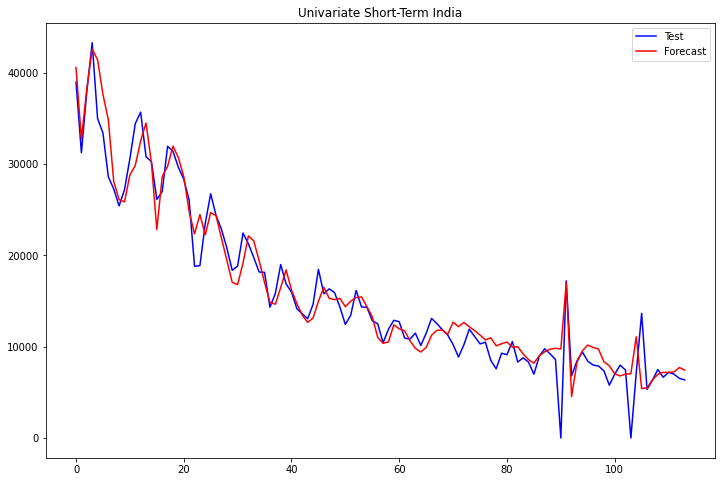

In [176]:
evaluate.plot_fore_test(india_uni_test_short_denorm[:-1], yhat_uni_india_short_denorm[14:-1], "Univariate Short-Term India")

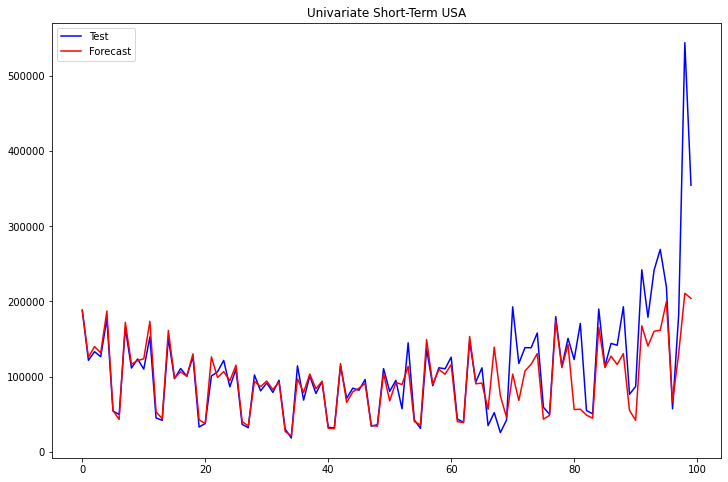

In [174]:
evaluate.plot_fore_test(usa_uni_test_short_denorm, yhat_uni_usa_short_denorm, "Univariate Short-Term USA")

In [175]:
evaluate.plot_fore_test(india_multi_test_np_denorm[14:-1], yhat_multi_india_denorm[:-1], "Multivariate Short-Term India")

NameError: name 'india_multi_test_np_denorm' is not defined